# β-Oxidação - Representação em Grafo

"Mapa das reações da beta-oxidação mostrando os compostos orgânicos mais importantes do processo. As ligações entre os nós representam as reações químicas, organizadas em pares substrato-produto através de uma estrutura de dicionário. Os pesos nas conexões indicam quais enzimas são responsáveis por catalizar cada reação da via metabólica."

In [1]:
betaoxidação = { 
    "ácido graxo": {
        "acil-CoA": {"label": "acil-CoA-sintetase"}
    },
    
    "acil-CoA": {
        "trans-Δ²-Enoil-CoA": {"label": "acil-CoA-desidrogenase"} # desidrogenação do Acil
    },
    
    "trans-Δ²-Enoil-CoA":{
        "b-hidroxiacil-CoA": {"label": "enoil-CoA-hidratase"}, # hidratação da trans
    },
    
    "b-hidroxiacil-CoA": {
        "b-cetoacil-CoA": {"label": "b-hidroxiacilCoA-desidrogenase"}, # desidrogenação da hidroxiacil
    },
    
    "b-cetoacil-CoA":{
        "acetil-CoA":{"label": "acil-CoA-acetiltransferase"}, # catalisação
        "acil-CoA":{"label": "acil-CoA-acetiltransferase"}
    }
    
}

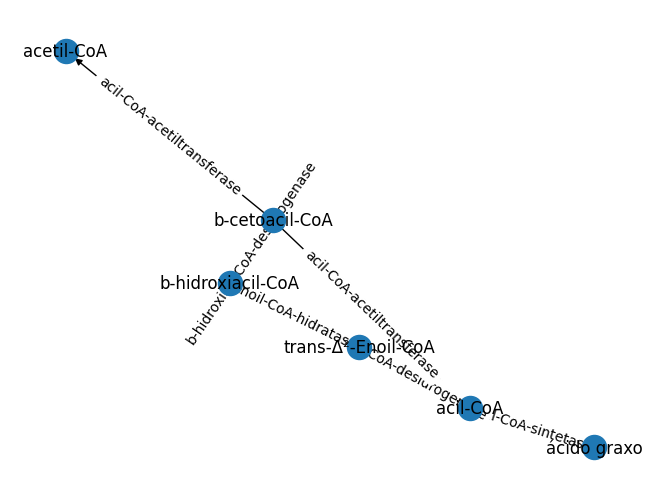

In [2]:
from random import randint
import networkx as nx

SEMENTE_ALEATORIA = randint(1, 100)

NOME_ROTULO = "label"
 
g = nx.DiGraph(betaoxidação)
 
posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)

nx.draw(g, with_labels=True, pos=posicao)
 
pesos = nx.get_edge_attributes(g, NOME_ROTULO)

nx.draw_networkx_edge_labels(g, posicao, edge_labels=pesos);

strict digraph "" {
	"ácido graxo" -> "acil-CoA"	[label="acil-CoA-sintetase"];
	"acil-CoA" -> "trans-Δ²-Enoil-CoA"	[label="acil-CoA-desidrogenase"];
	"trans-Δ²-Enoil-CoA" -> "b-hidroxiacil-CoA"	[label="enoil-CoA-hidratase"];
	"b-hidroxiacil-CoA" -> "b-cetoacil-CoA"	[label="b-hidroxiacilCoA-desidrogenase"];
	"b-cetoacil-CoA" -> "acil-CoA"	[label="acil-CoA-acetiltransferase"];
	"b-cetoacil-CoA" -> "acetil-CoA"	[label="acil-CoA-acetiltransferase"];
}



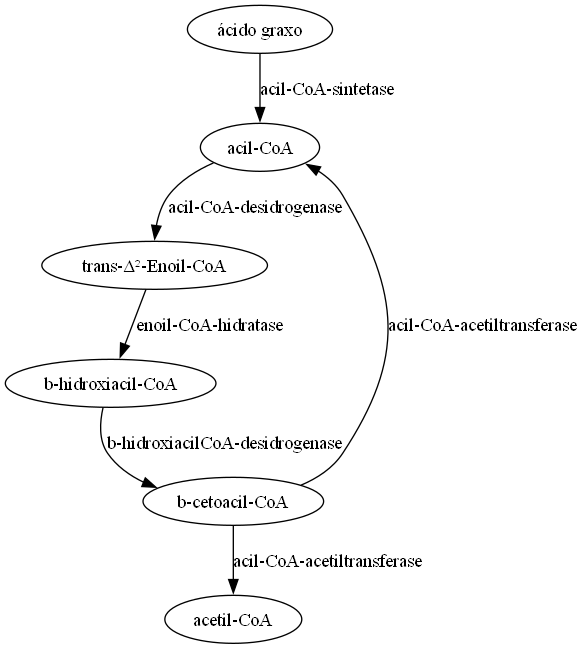

In [5]:
from networkx.drawing.nx_agraph import to_agraph
 
betaoxidação = to_agraph(g)
 
print(betaoxidação.to_string())
 
from IPython.display import Image, display
 
display(Image(betaoxidação.draw(format="png", prog="dot")))
betaoxidação.draw("betaoxidacao.png", format="png", prog="dot")
